In [1]:
!pip3 install geopandas

In [2]:
# Geo Tools
import geopandas as gpd

# Data Manipulation & Visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
import os

# Own modules
from dataExtraction import extract

In [3]:
df = pd.read_csv('data_clean.csv')
df.head()

,Unnamed: 0,title,company_name,location,via,description,job_highlights,detected_extensions,job_id,salary,...,Tensorflow,Teamwork,Time_series_analysis,Unsupervised_learning,UX_design,Visualization,Web_development,XML,YAML,YARN
0,0,Junior Data Scientist,ING,Amsterdam,ING Careers,As the data driven mindset is more and more em...,As the data driven mindset is more and more em...,"{'posted_at': '6 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBTY2llbnRpc3...,Not available,...,0,0,0,0,0,1,0,0,0,0
1,1,"JUNIOR DATA SCIENTIST - Dubai, UAE",Cobblestone Energy,Utrecht,LinkedIn,"Location: Dubai, UAE (We provide visa sponsors...","Location: Dubai, UAE (We provide visa sponsors...","{'posted_at': '4 hours ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJKVU5JT1IgREFUQSBTQ0lFTlRJU1...,60000,...,0,0,0,0,0,1,0,0,0,0
2,2,Data Scientist Mobiliteit,TNO,The Hague,TNO,Halen we in Nederland de klimaatdoelen op het ...,Halen we in Nederland de klimaatdoelen op het ...,"{'posted_at': '5 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCBNb2JpbG...,Not available,...,0,0,0,0,0,0,0,0,0,0
3,3,Data Scientist Real Estate for Catella Investm...,Catella Investment Management Benelux,Maastricht,Limburgvac,As a Data Scientist in the Research & Investme...,As a Data Scientist in the Research & Investme...,"{'posted_at': '20 hours ago', 'schedule_type':...",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCBSZWFsIE...,Not available,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,Effectory,Amsterdam,Effectory Jobs,Improving the working lives of millions of peo...,Improving the working lives of millions of peo...,{'schedule_type': 'Full–time'},eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCIsImh0aW...,68750.0,...,0,0,0,0,0,1,0,0,0,0


### 1. Geographic Distribution of Jobs

Reading in the geolocation cache in order to access stored coordinates. 

In [4]:
locations_df = pd.read_csv('locations_cache.csv')
locations_df.set_index('location', inplace=True) 

Retrieve latitude and longitude from the geo-cache in order to aid in geographic distribution visualization.

In [5]:
location_count = df['location'].value_counts().reset_index()  # Determine the no. jobs in each location
location_count.rename(columns={'index': 'location', 'location': 'location_count'},
                                      inplace=True)

def retrieve_coordinates(x):  # Retrieve the lat and long from a listing location
    location = x['location']
    x['latitude'] = locations_df.loc[location, 'latitude']
    x['longitude'] = locations_df.loc[location, 'longitude']
    return x

location_count = location_count.apply(retrieve_coordinates, axis=1)
location_count = location_count[location_count.latitude != 'Not available']  # Remove Not availabel coordinates

print(location_count.head())
print(location_count.shape)

                 location  location_count    latitude    longitude
0           United States             622  39.7837304  -100.445882
1       New York, NY, USA             561  40.7127281  -74.0060152
2  San Francisco, CA, USA             317  37.7790262  -122.419906
4        Chicago, IL, USA             224  41.8755616  -87.6244212
5         Boston, MA, USA             202  42.3554334   -71.060511
(891, 4)


#### 1.1 World Map

Visualize the job listing locations, as a heatmap overlayed onto a world-map. This visualization displays locations of high listing quantities versus, comparatively low quantities. 

Inspiration for the visualization from: https://towardsdatascience.com/easiest-way-to-plot-on-a-world-map-with-pandas-and-geopandas-325f6024949f

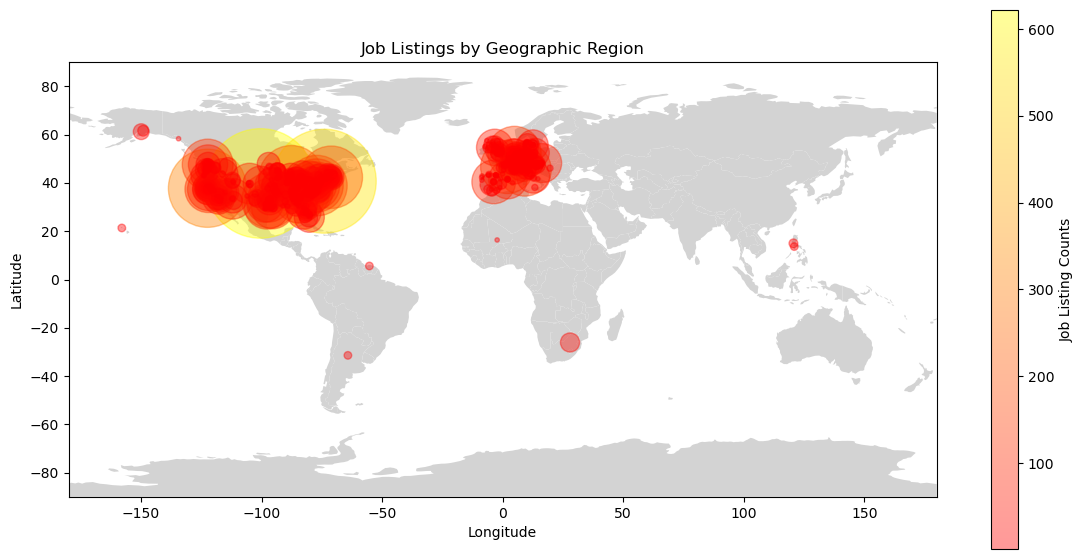

In [6]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  # Generate world map


fix, ax = plt.subplots(figsize=(14, 7))  # Specify plot size
worldmap.plot(color="lightgrey", ax=ax)  # Specify map colour

lat = location_count['latitude'].astype(float)  # Convert coords and counts to floats
long = location_count['longitude'].astype(float)
listing_count = location_count['location_count'].astype(float)


plt.scatter(x=long, y=lat, s=listing_count * 10, c=listing_count, alpha=0.4, cmap='autumn')
plt.colorbar(label='Job Listing Counts')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title('Job Listings by Geographic Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### 1.2 Country Distribution

Visualize the quantity of job listing per country.

In [ ]:
#TODO Create country distribution

### 2. Data Science Skills

Visualize the in-demand skills of Data Scientists as determined by job listing analysis.

In [ ]:
# Create bar-chart for top n skills

skills_df = df.iloc[:, 13:]
skills_df_sum = pd.DataFrame(skills_df.sum())
skills_df_sum.rename(columns={ skills_df_sum.columns[0]: "amount" }, inplace = True)
skills_df_sum = skills_df_sum.sort_values(by=["amount"], ascending=False)

# Set n
n = 30
skills_df_sum_top = skills_df_sum.head(n)
skills_df_sum_top

# Create chart'>' not supported between instances of 'numpy.ndarray' and 'str'
sns.barplot(data=skills_df_sum_top, x=skills_df_sum_top.index, y="amount")
plt.xticks(rotation=90)
plt.xlabel("Skills")
plt.ylabel("Total Amount of Occurrences in Job Offers")
plt.title("Most Important Skills in Data Science")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

### 3. Salary

When we inspect the salaries, we can see that there are outliers within the data, many of the salaries are at the very low end, with a few at the very high end.

In [7]:
salaries = df.salary[df.salary != 'Not available']
salaries = salaries.astype(float)
print(f"No. of salaries: {salaries.count()}")
print(f"max salary: {salaries.max()}")
print(f"min salary: {salaries.min()}")
print(f"mean salary: {salaries.mean()}")

No. of salaries: 2157
max salary: 203302425.0
min salary: 2.0
mean salary: 3222208.17431618


In [8]:
salaries[salaries > 2000000].count()

475

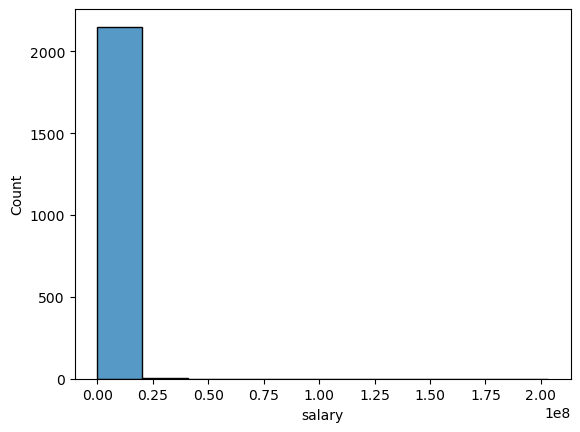

In [9]:
ax = sns.histplot(salaries, bins=10)

In [10]:
print(f"Salaries above 15000: {salaries[salaries>15000].count()}")
print(f"salaries below 15000: {salaries[salaries<=15000].count()}")

Salaries above 15000: 1659
salaries below 15000: 498


<Axes: >

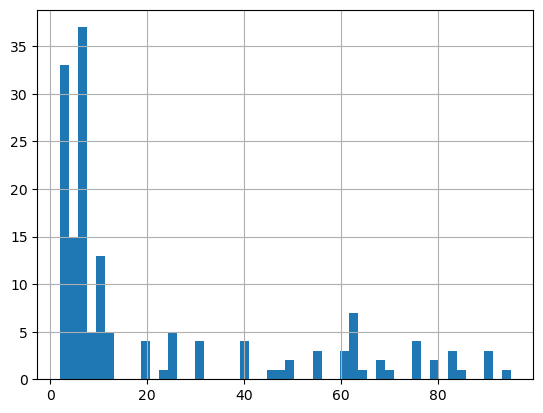

In [11]:
salary_hourly = salaries[salaries<100]
salary_hourly.hist(bins=50)

<Axes: >

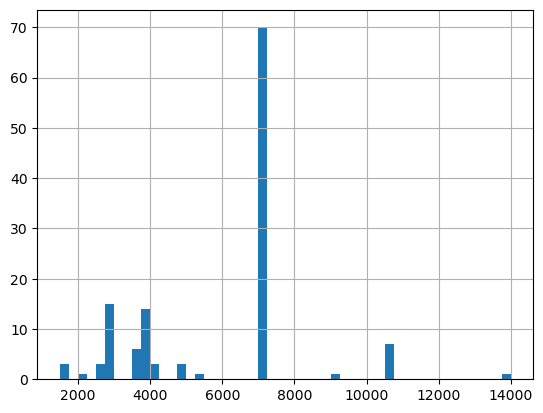

In [12]:
salary_monthly = salaries[salaries>1000]
salary_monthly = salary_monthly[salary_monthly<15000]
salary_monthly.hist(bins=50)

<Axes: >

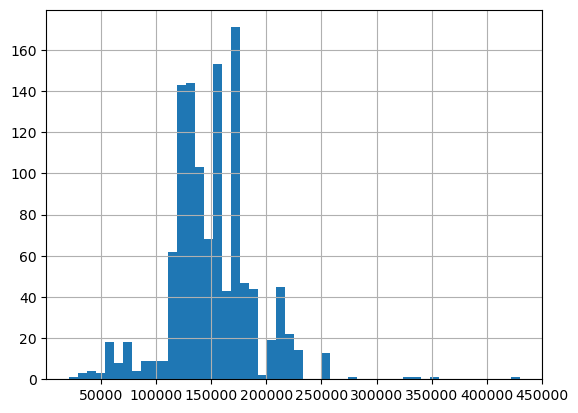

In [13]:
salary_yearly = salaries[salaries>15000]
salary_yearly = salary_yearly[salary_yearly<700000]
salary_yearly.hist(bins=50)